# Lab 1
In this lab, we'll follow in the steps of Ejnar Hertzsprung and Henry Norris Russell and make a plot of the colors versus magnitudes of thousands of stars in the Milky Way, showing the different stellar populations.

Before starting, you'll need to download a Gaia DR2 data file and read about the data format and description of variables:
### Gaia filters: https://www.cosmos.esa.int/web/gaia/iow_20180316
### data release 2 (DR2): https://www.cosmos.esa.int/web/gaia/dr2
### data file download (pick any files): http://cdn.gea.esac.esa.int/Gaia/gdr2/gaia_source/csv/
### data format description: https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html


In [1]:
# import modules

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table

#### 1. Read in the data
Download a file from the link above, unzip it, and save it someplace useful (moving the file to the same directory containing this Notebook will be easiest). The file should be named something like:
GaiaSource-1000172165251650944-1000424567594791808.csv. Enter your file name below:

In [2]:
data_file = 'GaiaSource_1000172165251650944_1000424567594791808.csv' #if you saved this in local directory just put the file name

In [3]:
#read in the data
Gaia_data = Table.read(data_file, format= 'csv')

**2. Make sure it worked and inspect data**

You can see what variables are in the file by printing `data.colnames()` -- check to make sure these data columns match the data format description above.

In [4]:
#check the data key/fields
print(Gaia_data.colnames)

['solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al', 'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_params_solved', 'astrometric_primary_flag', 'astrometric_weight_al', 'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error', 'mean_varpi_factor_al', 'astrometric_matched_observations', 'visibility_periods_used', 'astrometric_sigma5d_max', 'frame_rotator_object_type', 'matched_observations', 'duplicated_source', 'phot_g_n_obs', 'phot_g_mean_flux', 'phot_g_mean_flux_erro

**3. Filtering the data**

First, let's select the data columns that we need.

```python
data.keep_columns(['col1', 'col2', 'col3'])
```

To complete this lab you will need **five data columns from Gaia DR2**: (1, 2, 3) a measure of the (mean) magnitude of flux from the green-band, the blue-band, and the red-band filters, (4) the parallax angle, and (5) the ratio of the measured parallax to its associated error. Find the names of these columns in the data format description link above, and define them as variables below

In [5]:
# define column/variable names
green_mean_mag = 'phot_g_mean_mag'
blue_mean_mag = 'phot_bp_mean_mag'
red_mean_mag = 'phot_rp_mean_mag'
parallax_name = 'parallax'
parallax_signal_to_noise = 'parallax_over_error'

#create a new data table with just the relevant columns
Gaia_data.keep_columns([green_mean_mag, blue_mean_mag, red_mean_mag, parallax_name, parallax_signal_to_noise])

Next, we want to remove rows with "bad" or "missing" data. For example, sometimes the parallax of a star could not be properly calculated for some reason, and so we can't use that star in the H-R diagram. These will be listed as "NAN" (stands for "not a number") and we want to discard these rows. We can do this by selecting the rows that do NOT have NAN. If you have some table called `data` you can drop the NAN values like this:

```python
not_NAN = np.where(np.isnan(data['col1'])==False)
data = data[not_NAN]
```

**Take some time** to think through what these two lines of code are doing, and ask questions if you're unsure. The first line is finding all the rows that are not NAN, and the second line is updating the table to include only the rows with no NAN vlaues.

To apply this condition to multiple columns in the table at the same time, write:

```python
not_NAN = np.where((np.isnan(data['col1'])==False)&
                   (np.isnan(data['col2'])==False)&
                   (np.isnan(data['col3'])==False))
data = data[not_NAN]
```

After you create your five-column data table, use the code below to drop the NANs from your table. You can check to make sure you did this correctly by printing the lengths of your new table and the initial Gaia DR2 table you downloaded. Your new table should contain fewer rows (and fewer columns).

In [6]:
print('number of rows before removing NAN values:', len(Gaia_data))

# drop any NAN values that might be present
not_NAN = np.where((np.isnan(Gaia_data[green_mean_mag])==False)&
                 (np.isnan(Gaia_data[blue_mean_mag])==False)&
                 (np.isnan(Gaia_data[red_mean_mag])==False)&
                 (np.isnan(Gaia_data[parallax_name])==False)&
                 (np.isnan(Gaia_data[parallax_signal_to_noise])==False))
Gaia_data = Gaia_data[not_NAN]

print('number of rows after removing NAN values:', len(Gaia_data))

number of rows before removing NAN values: 14209
number of rows after removing NAN values: 12557


### Let's make a color-magnitude diagram

We will do this using the absolute magnitude and the color for each star from the Gaia DR2 data.

#### 4. Signal-to-noise cut
First, let's remove rows with uncertain parallax. We only want to use data where the parallax (i.e. distance) is well measured. We will define "good" data points as having high signal-to-noise (S/N) for the parallax. You can define that S/N cut by using a conditional "where" statement and applying it to your data table, like we did above with removing the NAN values.

In [7]:
# select your signal-to-noise data column
signaltonoise = Gaia_data[parallax_signal_to_noise]

# select only data with good parallax measurements (high signal-to-noise)
good_data = np.where(signaltonoise > 4.0)
Gaia_data = Gaia_data[good_data]

#### 5. Calculate a photometric color as Blue - Red
Insert your code for doing this below, using the defined Blue and Red variables. Assign the result to a variable with a name like `BlueMinusRed`. 

In [8]:
# Red and Blue magnitude data
Blue = Gaia_data[blue_mean_mag]
Red = Gaia_data[red_mean_mag]

# write a simple equation here for the result BlueMinusRed in terms of your Blue and Red above
BlueMinusRed = Blue-Red

#### 6. Gaia reports the apparent magnitudes. To convert to absolute magnitude, we need to know the distance to each star.
Gaia is an astrometric mission which makes very sensitive measurements of parallax as described in the pre-lab video. The parallax is 1/distance. Use the Gaia parallax saved in your filtered data table to calculate the distance to each star and call the resulting variable something like `distance`.

**Calculate your distances in pc** -- make sure to note the unit that Gaia uses for parallax (milliarcseconds)!

In [9]:
# define parallax in arcsec, noting that Gaia measurements use milliarcseconds
parallax_mas = Gaia_data[parallax_name]

# calculate the parallax here, converting the units as needed
distance = 1/(parallax_mas/1000)

#### 7. Now use the measured distances to convert apparent mag to absolute mag
The easiest way to convert apparent to absolute magnitude is to use the "distance modulus" as discussed in the pre-lab video.

Convert the Gaia G band apparent magnitude measurements to absolute G magnitudes and assign the result to a variable `GAbsMag`.

In Python, we can type out our equation using named variables. We can use `np.log10(x)` for the logarithm of base 10.

In [10]:
# define our apparent magnitude variable
GAppMag = Gaia_data[green_mean_mag]

# write your equation relating the 3 quantities: absolute magnitude GAbsMag, apparent magnitude GAppMag, and distance
GAbsMag = GAppMag-5*np.log10(distance/10)

#### 8. Color-magnitude diagram
Plot your ***good*** absolute magnitude measurements vs. photometric color for all the stars in your data file.

By default `plt.plot()` makes lines connecting points, which obviously we do not want for this plot... There are two "simple" ways to plot dots without connecting lines, as the examples below show:

1. Using extra parameters in `plt.plot()`

```python
plt.plot(x,y,marker='.',linestyle='') #specifies no line ('') and to use a small dot at each point ('.')
```

2. Using `plt.scatter()`
```python
plt.scatter(x,y,s=3) #generates a scatter plot, s is an optional parameter that controls dot size
```

You'll want to change the axis so that the brightness of stars is increasing going up (recall what that means for magnitudes). You can explicitly specify the limits with `plt.ylim()` to change the y-axis (putting the bigger number first will make that number the bottom limit and make it run in "reverse"). 

Don't forget to add a descriptive title and label the axes!

**Bonus:** use a colormap to make your plot closer to the ones you've likely seen in your textbooks (ie cool stars red, hot stars blue, middle stars yellow, etc.)

Number of stars in final data table: 3660


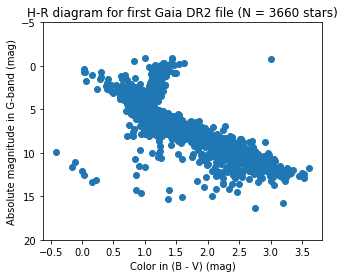

In [11]:
#make your plot here by changing the "color" and "magnitude" variables to the correct ones you calculated above
print('Number of stars in final data table:', len(Gaia_data))

plt.figure(figsize=(5,4))
plt.scatter(BlueMinusRed,GAbsMag)
plt.ylim(20,-5)

# add your own title and x and y axis labels
plt.title('H-R diagram for first Gaia DR2 file (N = 3660 stars)')
plt.xlabel('Color in (B - V) (mag)')
plt.ylabel('Absolute magnitude in G-band (mag)')
plt.show()

#### 9. Interpretation

Color-magnitude diagrams are used to classify populations of stars and understand their properties. Here we'll start to think about why they might be useful. Answer the following questions in the markdown cells provided after each.

#### a) Compare with your "neighbor(s)" -- do your plots look the same? Comment on any differences you notice.

N/A

#### b) What do your x- and y-axis mean?

Using the concepts of absolute magnitude and color temperature, think about what your plotted axes represent physically. 

Where are the most luminous stars on your plot? Where are the hottest stars?

Greater (i.e. more negative) absolute magnitude means a brighter star --> higher luminosity --> larger stellar radius (for fixed T).

Smaller value for (B-V) magnitude means that B mag is less than V mag --> more blue flux than red flux --> higher stellar temperature. (in other words: bluer stars are hotter)

So more luminous stars are higher up in the H-R diagram, and hotter stars are to the left. For example, OB-type stars are located in the upper left.

#### d) Stellar populations

On your diagram, do the stars uniformly fill the available space? Where are most of them located? Circle what you might describe as "populations" of stars in different regions of the diagram. There should be at least 3.

Which of your populations contain the most stars, and what does that mean?

No, the stars do not uniformly fill the available parameter space in the H-R diagram. The stars are mostly located along the region known as the "main sequence" (which is luminosity class V). Most of the stars are in the main sequence because that is where they spend most of their lives, burning hydrogen into helium.

Above the main sequence are the subgiants (L class IV), giants (L class II, III), and supergiants (L class I).

Below the main sequence are much smaller stars (actually, stellar remnants) called white dwarfs.

#### 10. Optional for more time or interest

Each file is a tiny subset of the available Gaia DR2 data. Some steps to make a nicer diagram would be:

1. Download 5-10 data files for a bigger dataset. 

2. Wite a function that accepts a filename (or a directory name) and goes through the steps above (ie loads the data, calculates the color and absolute magnitude, etc).

3. Run the function in a loop and collect all of the good data for color and magnitude from all of the files.

4. Make a new color-magnitude diagram using this much larger dataset and compare to your original plot.

If you aren't comfortable with steps 1 and 2 yet but still want to do this, I've created a combined file (`CombinedData.csv`) for the 10 most recent observations on the Gaia site with the filtering already done, so you could just load that in and then follow the rest of the steps to make a better plot. But it's good practice to know how to do this yourself!

Going through those steps, the populations you identified above should become more clear. You may also notice new ones emerge!

In [ ]:
#make a better plot here
# perform the same steps as above but with the 'CombinedData.csv' file